# Explore model results

Load the data using [MIKE IO](https://dhi.github.io/mikeio) and review it. Data is stored as a dfsu file. Specific points are stored in a dfs0 file. 

### Load packages

In [1]:
import mikeio
import numpy as np
import matplotlib.pyplot as plt 
plt.rcParams.update({'font.size': 10})

### Define paths

In [2]:
#mr_fldr = "../output_sample/"
mr_fldr = "../output/" # Change the output folder if needed  
fig_fldr = "../figures/"
save_fig = False if "sample" in mr_fldr else True
show_fig = True

## Open the model result file

In [3]:
dfs = mikeio.open(f"{mr_fldr}Area.dfsu")
dfs

<mikeio.Dfsu2DH>
number of elements: 8058
number of nodes: 4237
projection: LONG/LAT
items:
  0:  Sign. Wave Height <Significant wave height> (meter)
  1:  Peak Wave Period <Wave period> (second)
  2:  Wave Period, T02 <Wave period> (second)
  3:  Mean Wave Direction <Mean Wave Direction> (degree)
time: 2022-01-01 00:00:00 - 2023-12-31 23:00:00 (35039 records)

## Mesh and bathymetry

In [4]:
geom = dfs.geometry

Calculate the total area covered (in km^2)

In [5]:
geom.get_element_area().sum()/(10**6)

np.float64(236124.18653026468)

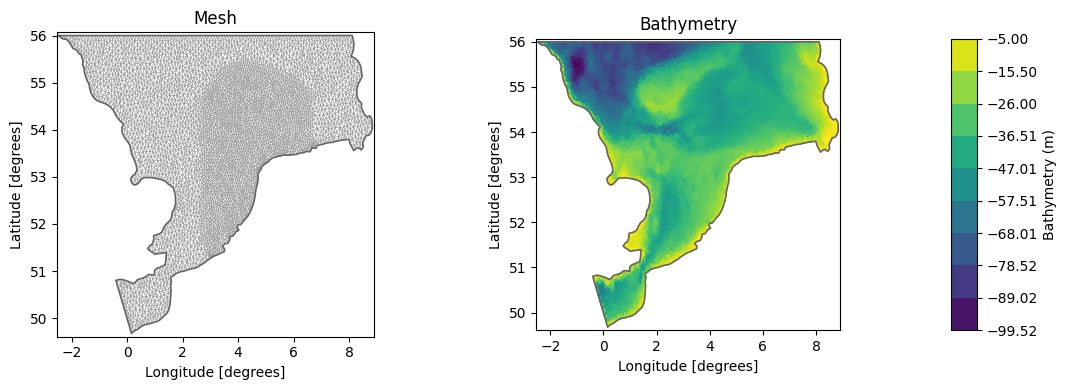

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(11.5, 4))
geom.plot.mesh(ax=axs[0])
geom.plot(ax=axs[1])
plt.tight_layout()
if save_fig:
    plt.savefig(f"{fig_fldr}geometry.png")
plt.show()

## Area plots

Read data from file but exclude first two days (spin-up).

In [7]:
ds = dfs.read(time = slice("2022-01-03", "2023-12-31"))
ds

<mikeio.Dataset>
dims: (time:34943, element:8058)
time: 2022-01-03 00:00:00 - 2023-12-31 23:00:00 (34943 records)
geometry: Dfsu2D (8058 elements, 4237 nodes)
items:
  0:  Sign. Wave Height <Significant wave height> (meter)
  1:  Peak Wave Period <Wave period> (second)
  2:  Wave Period, T02 <Wave period> (second)
  3:  Mean Wave Direction <Mean Wave Direction> (degree)

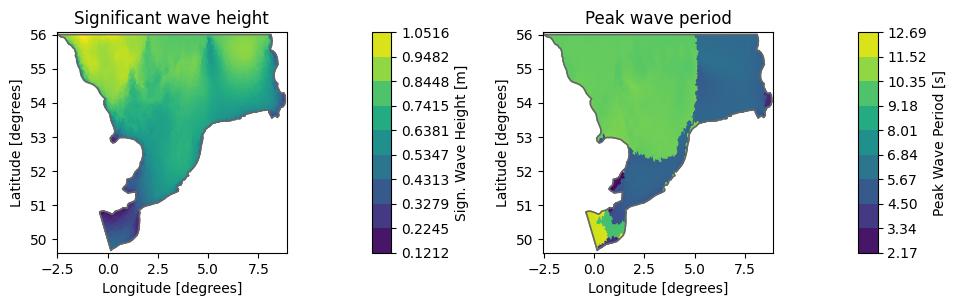

In [8]:
# Select time step and plot items
plot_time = "2022-05-01" if "2022-05-01" in ds.time else ds.time[-1]
fig,axs = plt.subplots(1, 2, figsize=(10, 5))
ds["Sign. Wave Height"].sel(time=plot_time).plot(ax=axs[0], title="Significant wave height")
ds["Peak Wave Period"].sel(time=plot_time).plot(ax=axs[1], title="Peak wave period")
plt.tight_layout()

if save_fig:
    plt.savefig(f"{fig_fldr}wave_conditions_{plot_time}.png")
if show_fig:
    plt.show()

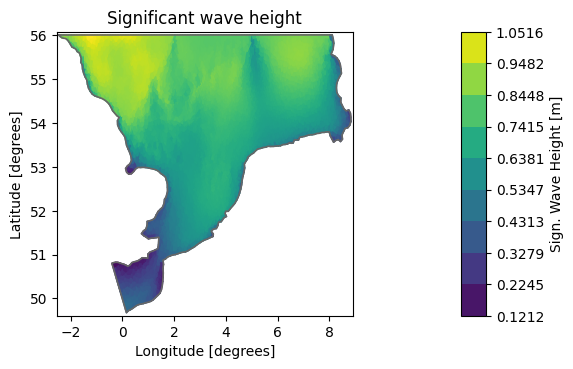

In [9]:
ds["Sign. Wave Height"].sel(time=plot_time).plot(title="Significant wave height")
plt.tight_layout()
if save_fig:
    plt.savefig(f"{fig_fldr}wave_height_{plot_time}.png")
if show_fig:
    plt.show()

## Mean wave direction quiver plot

Quiver plot of mean wave direction with arrows scaled by significant wave heights.

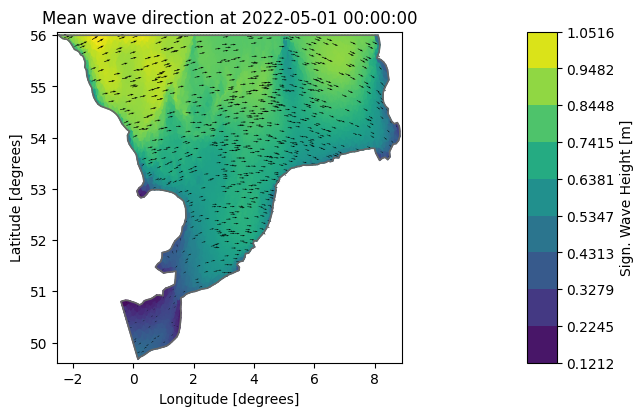

In [10]:
# Get time step index
if "sample" in mr_fldr:
    time_step = int(ds.time.get_loc(plot_time))
else:
    time_step = int(ds.time.get_loc(plot_time).start)

# Downsampling step for arrows
step = 10

# Geometry
ec = ds.geometry.element_coordinates
x = ec[:,0][::step]
y = ec[:,1][::step]

# Extract direction and height
directions = ds["Mean Wave Direction"][time_step].values[::step]
heights = ds["Sign. Wave Height"][time_step].values[::step]

# Convert directions to radians
radians = np.deg2rad(directions)

# Scale unit vectors by SWH
u_ds = heights * np.cos(radians)
v_ds = heights * np.sin(radians)

# Plot background (Significant Wave Height as colormap)
ax = ds["Sign. Wave Height"][time_step].plot(figsize=(8,8))
ax.title.set_text(f"Mean wave direction at {ds.time[time_step]}")

# Overlay arrows, with length proportional to SWH
ax.quiver(x, y, u_ds, v_ds, scale=50, minshaft=2, color="black")
if save_fig:
    plt.savefig(f"{fig_fldr}wave_directions_{plot_time}.png")
if show_fig:
    plt.show()

## Timeseries

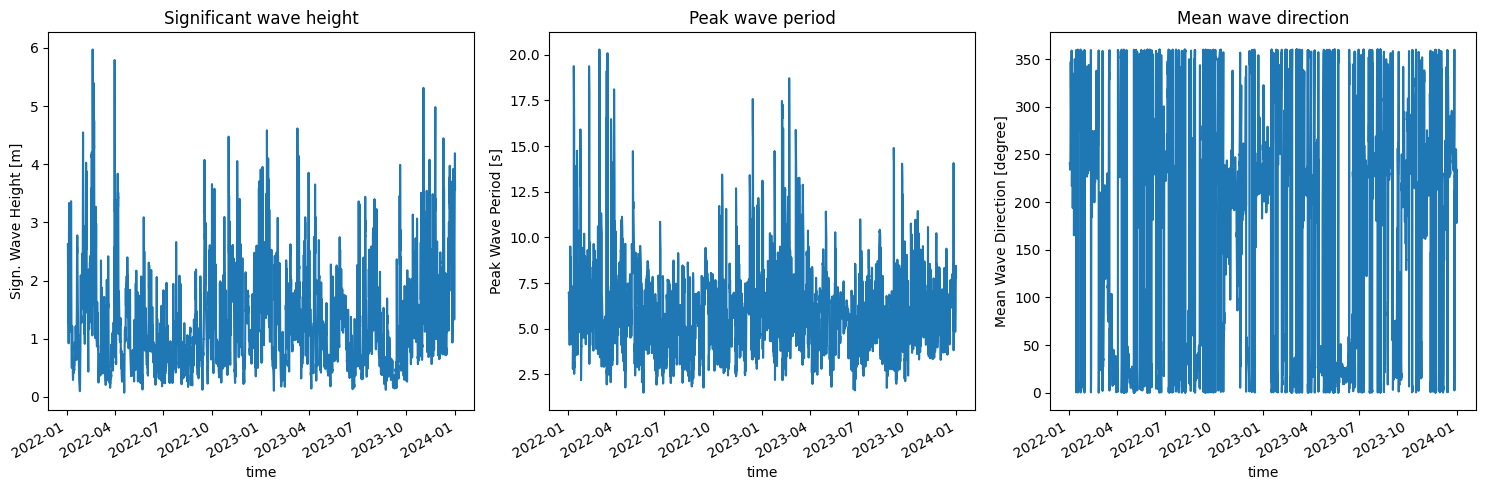

In [11]:
# Select spatial point and plot items
p = (2.5, 51.5)
fig,axs = plt.subplots(1,3, figsize=(15,5))
ds["Sign. Wave Height"].sel(x=p[0], y=p[1]).plot(ax=axs[0], title="Significant wave height")
ds["Peak Wave Period"].sel(x=p[0], y=p[1]).plot(ax=axs[1], title="Peak wave period")
ds["Mean Wave Direction"].sel(x=p[0], y=p[1]).plot(ax=axs[2], title="Mean wave direction")
plt.tight_layout()
if save_fig:
    plt.savefig(f"{fig_fldr}wave_conditions_{p[0]}E_{p[1]}N.png")
if show_fig:
    plt.show()

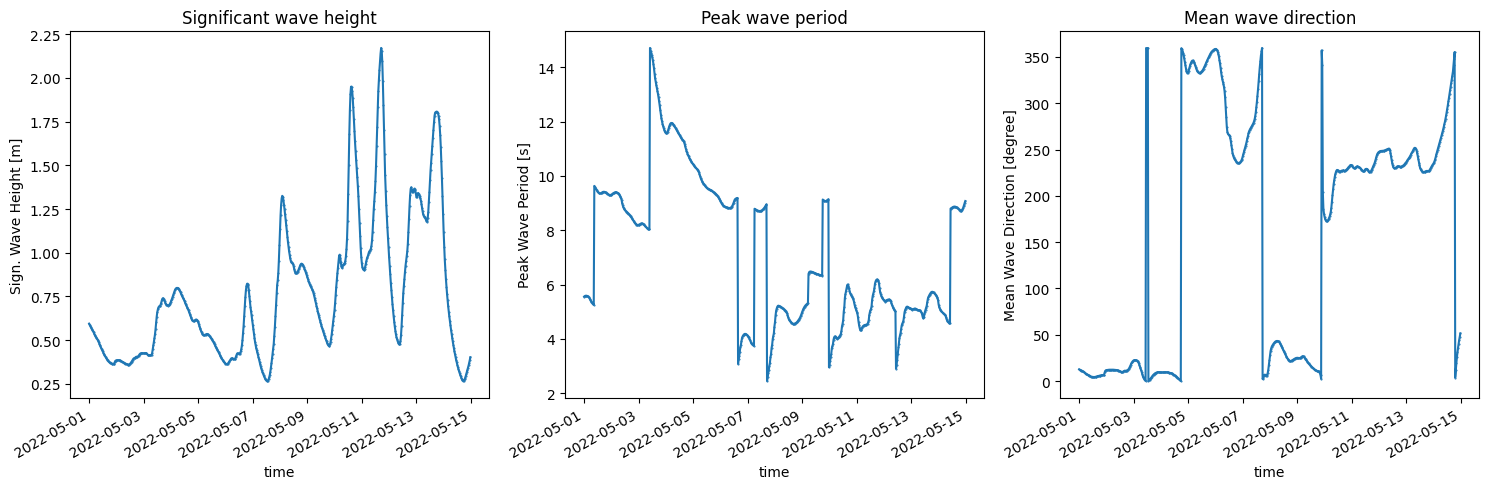

In [12]:
# Zoom in on a time interval
time_interval=slice("2022-05-01","2022-05-14") if "2022-05-01" in ds.time else ds.time[:100]
fig,axs = plt.subplots(1,3, figsize=(15,5))
ds["Sign. Wave Height"].sel(x=p[0], y=p[1], time=time_interval).plot(ax=axs[0], marker = 'o', markersize=0.5, title="Significant wave height")
ds["Peak Wave Period"].sel(x=p[0], y=p[1], time=time_interval).plot(ax=axs[1], marker = 'o', markersize=0.5, title="Peak wave period")
ds["Mean Wave Direction"].sel(x=p[0], y=p[1], time=time_interval).plot(ax=axs[2], marker = 'o', markersize=0.5, title="Mean wave direction")
plt.tight_layout()
if save_fig:
    plt.savefig(f"{fig_fldr}wave_conditions_{p[0]}E_{p[1]}N_zoom.png")
if show_fig:
    plt.show()


You can go to the model_validation_*.ipynb files to see how the model results are compared to observations.